In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = pd.read_csv('C:/just/1hour_peak_payments.csv',sep=',')
x = d.values

print int(x[12414][0][3:5])
print x[0][1]
print x

5
9056289950
[['10:00:00.068' 9056289950L]
 ['10:00:00.070' 9038192302L]
 ['10:00:00.074' 9628695862L]
 ..., 
 ['10:59:06.586' 9632352158L]
 ['10:59:06.586' 9622144580L]
 ['10:59:06.598' 9602790076L]]


In [3]:
#создаем список абонентов за первые 15 минут
a1 = []
a2 = [] #список повторных за 15 минут
a3 = [] #остальное
c2 = [] #количество повторных. с 16 минуты.

for i in range(0,len(x)):
    if int(x[i][0][3:5])>=15:
        break
    
    if x[i][1] in a1:
        a2.append(x[i][1])
        continue
    else:
        a1.append(x[i][1])
        
print len(a1), len(a2)

35903 625


In [8]:
count = 0
c = [0]
for i in c1:
    count +=i
    c.append(count)
print c, len(c)

[0, 2450, 4824, 7312, 9652, 12067, 14512, 17087, 19500, 21974, 24445, 26789, 29234, 31539, 34113, 36528, 39049, 41640, 44197, 46854, 49404, 51795, 54290, 56743, 59270, 61797, 64345, 66899, 69285, 71634, 74068, 76522, 78874, 81244, 83652, 85975, 88240, 90605, 92917, 95140, 97349, 99668, 101993, 104255, 106595, 108846, 111114, 113272, 115509, 117806, 120120, 122318, 124363, 126483, 128736, 131134, 133365, 135614, 137643, 139881, 141971] 61


In [9]:
#a1 = [] #массив уникальных за 15 минут (двигается вправо)
a2 = [] #повторяющиеся на след минуту после массива.
a3 = [] #неповторяющиеся на след минуту после массива.
c2 = [] #количество повторных. с 16 минуты.
# c - нумерация смены минуты

for j in range(0,len(c)-16):
    a2 = []
    #проверяем минуту j+15
    for i in range(c[j+15], c[j+16]):
        if x[i][1] in a1:
            a2.append(x[i][1])
            continue
        else:
            a1.append(x[i][1])
    c2.append(len(a2)) 
    
    
    #актуальный a1 на след момент 
    for i in range(c[j], c[j+1]):
        try: 
            a1.remove(x[i][1])
        except:
            continue
print c2

[52, 61, 63, 80, 64, 65, 67, 60, 62, 55, 58, 57, 58, 65, 43, 53, 57, 53, 69, 61, 54, 74, 62, 44, 52, 65, 54, 59, 64, 52, 52, 51, 49, 56, 51, 68, 69, 53, 55, 49, 47, 56, 70, 54, 51]


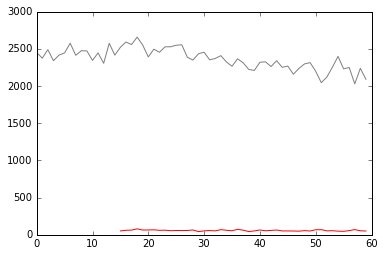

In [10]:
#графики
c1 = [] #кол-во всего
count = 0
j = 0
for i in range(0,len(x)):
    if i == len(x)-1:
        c1.append(count+1)
    if j==int(x[i][0][3:5]):
        count +=1
    else:
        c1.append(count)
        count=1
        j +=1
X1 = np.arange(len(c1))
X2 = np.arange(len(c1))[15:]
plt.plot(X1,c1,'grey')
plt.plot(X2,c2,'red')

plt.show() 

In [11]:
print len(c2)

45
